In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
from fbprophet import Prophet

In [4]:
import math
from sklearn.preprocessing import minmax_scale

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
stores = pd.read_csv('data/stores.csv')
feature = pd.read_csv('data/features.csv')

In [7]:
test.insert(3, 'Weekly_Sales', 0)

In [8]:
#merged = pd.concat([train, test], axis=0)
merged = train.copy()
merged = merged.sort_values(by=['Store','Dept','Date'])
mf = feature.merge(stores, how='inner', on=['Store'])
merged = pd.merge(merged, mf, how='inner', on=['Date','Store','IsHoliday'])

In [9]:
merged['Date'] = pd.to_datetime(merged['Date']) 

In [10]:
merged['month'] = merged['Date'].dt.month
merged['year'] = merged['Date'].dt.year

In [11]:
merged.fillna(-999, inplace=True)

In [12]:
merged['int_date'] = merged['Date'].dt.to_period('M') - merged['Date'].min().to_period('M')

In [13]:
merged['int_week'] = merged['Date'].dt.week
merged['week'] = merged['Date'].dt.week

In [14]:
merged['int_week'].loc[merged[merged['year']==2011].index] += 52
merged['int_week'].loc[merged[merged['year']==2012].index] += 52+52

In [15]:
holiday = pd.DataFrame(merged[merged['IsHoliday']]['Date'].unique())
holiday['holiday'] = 'h'
holiday.columns=['ds','holiday']

In [24]:
def serarch(df, s, d):
    return df[(df['Store']==s)&(df['Dept']==d)]

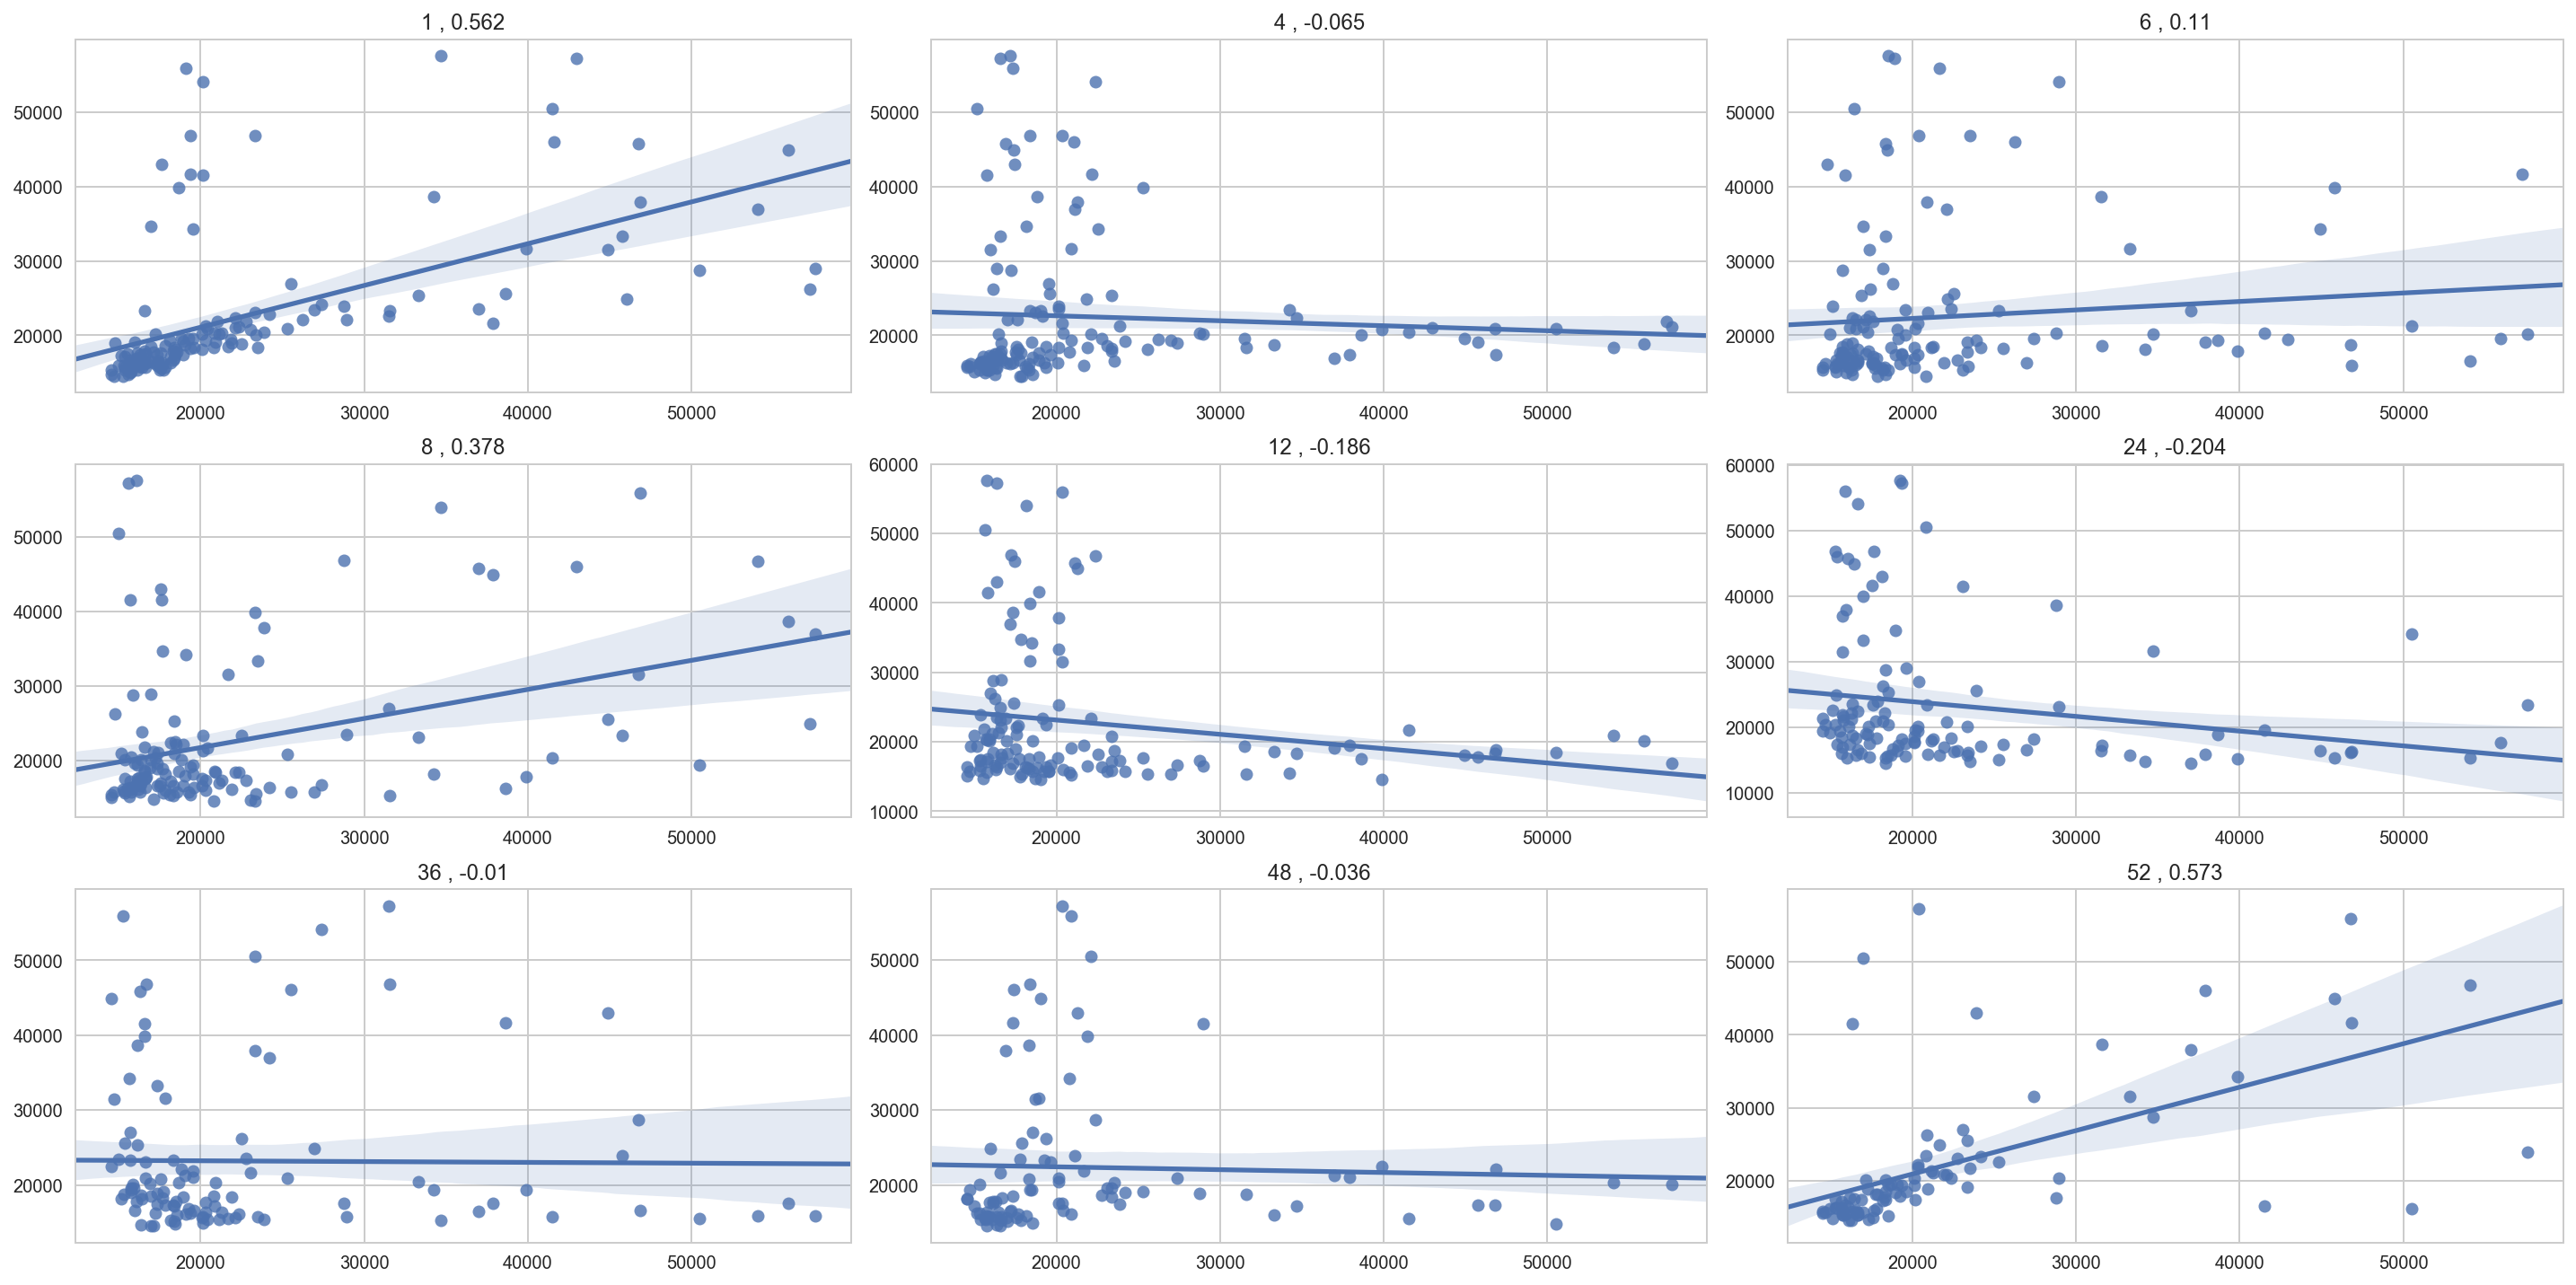

In [45]:
plt.figure(figsize=(20, 10))
for idx, wp in enumerate([1, 4, 6, 8, 12, 24,36, 48,52]):
    lag1 = merged.copy()
    lag1['int_week'] += wp
    lag1 = lag1.rename(columns={'Weekly_Sales': 'Weekly_Sales_p1'})
    lag1 = lag1[['Store','Dept','Weekly_Sales_p1','int_week']]
    #tmp = pd.merge(merged, lag1, how='left', on=['Store','Dept','int_week'])
    
    tmp1 = serarch(merged, 1, 1)
    tmp2 = serarch(lag1, 1, 1)
    tmp3 = tmp1.merge(tmp2, how='left', on=['int_week'])
    tmp3 = tmp3[~tmp3['Weekly_Sales_p1'].isnull()]
    plt.subplot(3,3,idx+1)
    #plt.scatter(tmp3['Weekly_Sales'].values, tmp3['Weekly_Sales_p1'].values)
    sns.regplot(tmp3['Weekly_Sales'].values, tmp3['Weekly_Sales_p1'].values)
    #cor = sp.spatial.distance.correlation(tmp3['Weekly_Sales'].values, tmp3['Weekly_Sales_p1'].values).round(3)
    cor = pd.DataFrame([tmp3['Weekly_Sales'].values, tmp3['Weekly_Sales_p1'].values]).T.corr()[0][1].round(3)
    plt.title('{} , {}'.format(wp, cor))
plt.tight_layout(pad=1, h_pad=1)
plt.show();

- 상관관계가 높지는 않지만 1, 8, 52 주 전 데이터와 있는것으로 나타난다